##  Homework 4 - Problem 1 : Convolutional networks for MNIST 


### Student: Dimitrios Tanoglidis


### Part a)

I will work using keras...

In [10]:
#Import stuff
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical 

# Adjust rc parameters to make plots pretty
def plot_pretty(dpi=200, fontsize=9):
    
    import matplotlib.pyplot as plt

    plt.rc("savefig", dpi=dpi)       # dpi resolution of saved image files
    plt.rc('text', usetex=True)      # use LaTeX to process labels
    plt.rc('font', size=fontsize)    # fontsize
    plt.rc('xtick', direction='in')  # make axes ticks point inward
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=10) 
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=10) 
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [0.5, 1.1]) # fix dotted lines

    return

plot_pretty()

In [2]:
data_train = np.float64(np.load("/Users/Dimitris/Desktop/Machine_Learning/HW2/train_images.npy"))
data_test = np.float64(np.load("/Users/Dimitris/Desktop/Machine_Learning/HW2/test_images.npy"))
labels_train = np.float32(np.load("/Users/Dimitris/Desktop/Machine_Learning/HW2/train_labels.npy"))
labels_test = np.float32(np.load("/Users/Dimitris/Desktop/Machine_Learning/HW2/test_labels.npy"))


# Concatenate
X = (np.concatenate((data_train,data_test))).reshape(-1,28,28,1).astype(np.float64) / 255.
Y = to_categorical(np.concatenate((labels_train,labels_test)))

# Split in train, validation, test set
train_set = (X[:50000], Y[:50000])
val_set = (X[50000:60000], Y[50000:60000])
test_set = (X[60000:70000], Y[60000:70000])

# Get a subsample of the training set to make it fast /keep 20000 samples
train_fast = (X[:20000], Y[:20000])

In [3]:
# build the  original model
model = keras.models.Sequential()
model.add(keras.layers.InputLayer((28,28,1)))
model.add(keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Dropout(rate=0.4))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Dropout(rate=0.4))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=1024, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))
model.compile(optimizer=tf.train.AdadeltaOptimizer(0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model.fit(x=train_set[0], y=train_set[1],
          epochs=18, batch_size=16,
          shuffle=True,
          validation_data=val_set)

Train on 50000 samples, validate on 10000 samples
Epoch 1/18
50000/50000 [==============================] - 93s 2ms/step - loss: 0.1127 - acc: 0.9646 - val_loss: 0.0726 - val_acc: 0.9799
Epoch 2/18
50000/50000 [==============================] - 93s 2ms/step - loss: 0.1101 - acc: 0.9650 - val_loss: 0.0697 - val_acc: 0.9799
Epoch 3/18
50000/50000 [==============================] - 88s 2ms/step - loss: 0.1069 - acc: 0.9663 - val_loss: 0.0671 - val_acc: 0.9813
Epoch 4/18
50000/50000 [==============================] - 94s 2ms/step - loss: 0.1015 - acc: 0.9671 - val_loss: 0.0661 - val_acc: 0.9803
Epoch 5/18
50000/50000 [==============================] - 128s 3ms/step - loss: 0.1013 - acc: 0.9682 - val_loss: 0.0640 - val_acc: 0.9810
Epoch 6/18
50000/50000 [==============================] - 94s 2ms/step - loss: 0.0989 - acc: 0.9690 - val_loss: 0.0629 - val_acc: 0.9827
Epoch 7/18
50000/50000 [==============================] - 92s 2ms/step - loss: 0.0949 - acc: 0.9699 - val_loss: 0.0611 - val_ac

In [5]:
model.evaluate(test_set[0], test_set[1])

10000/10000 [==============================] - 3s 332us/step


[0.06830846932101994, 0.9785]

Printing the model summary below, we can see the number of parameters at each layer.
However, let's try to explain where these numbers come from.

In the first convolutional layers (covn2d) we have 16 filters of size $(3 \times 3)$. The total number of parameters learned in that layer is thus (including one bias parameter per filter):

\begin{equation}
(3 \times 3 + 1)\times 16  = 160
\end{equation}

For the second convolutional layer, we have to take into account that we have as input 16 filters from the first layer
now the second layer has 32 filters, thus:

\begin{equation}
(3 \times 3 \times 16 + 1)\times 32  = 4640
\end{equation}

For the first dense (fully connected layer) we have as iput 1568 parameters (the output for the flattening layer), plus one bias parameter and output 1024 parameters. So, total number of learned parameters:

\begin{equation}
(1568 + 1)\times 1024 = 1606656 
\end{equation}

For the last dense layer, we have as input 1024 parameters and output 10, thus the total number of learned parameters (including one bias) is:

\begin{equation}
(1024+1)\times 10 = 10250
\end{equation}

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
__________

Let's now plot the error rate, defined as $1 - accuracy$, for the training and validation samples.

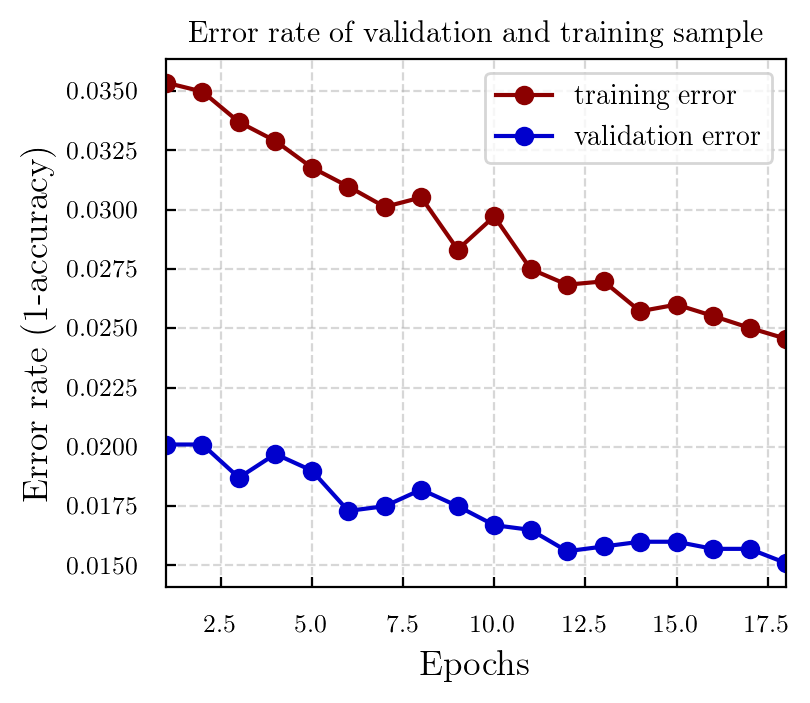

In [31]:
Epochs = np.arange(1,19,1)
history_dict = model.history.history

train_acc = history_dict['acc']
test_acc = history_dict['val_acc']
train_err = 1.0 - np.asarray(train_acc)
test_err = 1.0 - np.asarray(test_acc)

plt.figure(figsize=(4, 3.5))

plt.plot(Epochs, train_err, c = 'darkred', marker='o',label='training error')
plt.plot(Epochs, test_err , c = 'mediumblue', marker='o', label='validation error')

plt.grid(ls='--',alpha=0.5)
plt.xlabel('Epochs', fontsize=13);plt.ylabel('Error rate (1-accuracy)',fontsize=13)
plt.title('Error rate of validation and training sample')
plt.xlim(1,18)

plt.legend(frameon=True, loc='upper right', fontsize=10)
plt.show()

Let's now show an image of the images estimated in the first layer of the model.

For this I used parts of the code that can be found in the book "Deep learning in Python" by Francois Chollet.

In [107]:
from tensorflow.keras import backend as K

In [108]:
def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255.
    x = np.clip(x, 0 , 255).astype(np.float64)
    return x

In [109]:
def generate_pattern(layer_name, filter_index, size=28):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:,:,:,filter_index])
    grads = K.gradients(loss, model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    
    iterate = K.function([model.input],[loss,grads])
    input_img_data = np.random.random((1,size,size,1))*20 + 128.
    
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value*step
        
    img = input_img_data[0]
    return deprocess_image(img)        

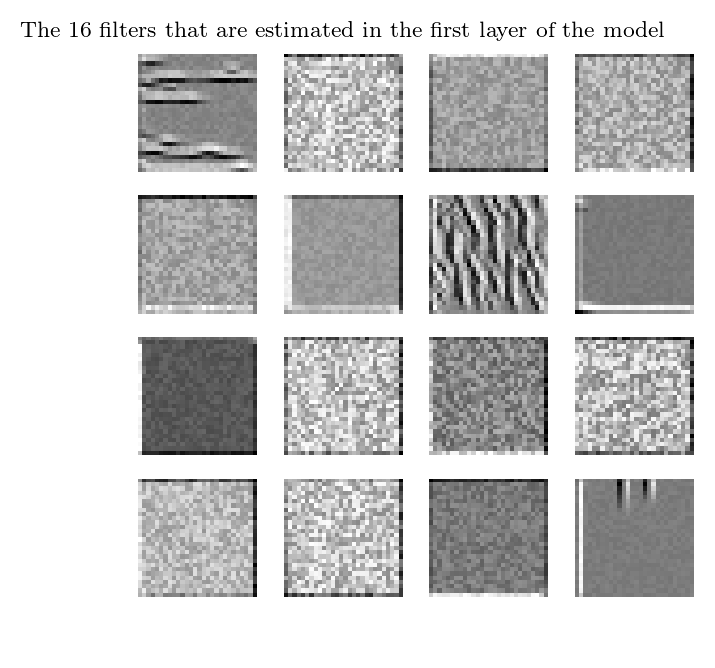

In [120]:
nrows = 4
ncols = 4

plt.figure(figsize=(ncols*0.9, nrows*0.9))
for i in range(nrows*ncols):
    if (i==2):
        plt.title('The 16 filters that are estimated in the first layer of the model', fontsize=8)
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(generate_pattern('conv2d',i).reshape((28,28)), cmap='gray')
    plt.axis('off')
       
plt.show()

